In [396]:
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
#f_path = "/Library/Fonts/AppleGothic.ttf (맥, Mac)
f_path = "C:/Windows/Fonts/malgun.ttf"
#(윈도우즈,Windows)
font_name = font_manager.FontProperties(fname= f_path).get_name()
rc('font', family = font_name)

In [397]:
card = pd.read_csv('../data/card/credit_card_data.csv')
card.columns
card

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
0,L011,2016,1,812,2,서울,NaN,10대,55000,1.44,...,0,0,0,1120000,8210000,78020000,92170000,87260000,0,0
1,L011,2016,2,773,4,서울,NaN,10대,380000,1.71,...,510000,220000,1020000,680000,4660000,23300000,8260000,42410000,4000,1000
2,L011,2016,3,771,4,서울,NaN,10대,387000,1.75,...,490000,210000,1140000,640000,4370000,22930000,8300000,41710000,3000,1000
3,L011,2016,4,770,4,서울,NaN,10대,412000,1.76,...,510000,240000,1340000,510000,4770000,22160000,9460000,41040000,4000,1000
4,L011,2016,5,771,4,서울,NaN,10대,414000,1.75,...,490000,340000,1490000,640000,4740000,21960000,9660000,40850000,3000,1000
5,L011,2016,6,771,4,서울,NaN,10대,410000,1.75,...,410000,320000,1630000,680000,4730000,21380000,9470000,40130000,4000,2000
6,L011,2016,7,772,4,서울,NaN,10대,407000,1.75,...,520000,320000,1670000,610000,4680000,20230000,8790000,38970000,4000,2000
7,L011,2016,8,772,4,서울,NaN,10대,403000,1.75,...,400000,140000,1720000,830000,4950000,20400000,9660000,40770000,4000,2000
8,L011,2016,9,772,4,서울,NaN,10대,399000,1.74,...,420000,210000,1850000,920000,5240000,20450000,10060000,41590000,5000,2000
9,L011,2016,10,773,4,서울,NaN,10대,395000,1.73,...,460000,190000,1930000,890000,5860000,20780000,9720000,43070000,4000,2000


# 1.연령대별 월 카드 이용 총 금액

In [398]:
data1 = card.groupby('ages').monthly_card_spend.sum()
data1_df = pd.DataFrame(data1).reset_index()
data1_df

,ages,monthly_card_spend
0,10대,81220000
1,20대,340800000
2,30대,688800000
3,40대,774980000
4,50대,610670000
5,60대,380540000
6,70대,192990000
7,80대,90290000
8,90대,40520000


# 2. 지역별 월 카드 이용 총 금액

In [399]:
data2 = card.groupby('city').monthly_card_spend.sum()
data2_df = pd.DataFrame(data2).reset_index()
data2_df.head()

,city,monthly_card_spend
0,강원,175770000
1,경기,198500000
2,경남,164000000
3,경북,150840000
4,광주,186770000


# 3. 20대의 총 대출 금액 

In [400]:
card[card['ages'] == '20대'].monthly_loan.sum()

12659810000

# 4. 20대의 월 카드 이용 금액을 그래프로 나타내보세요

Text(0,0.5,'카드 이용 금액')

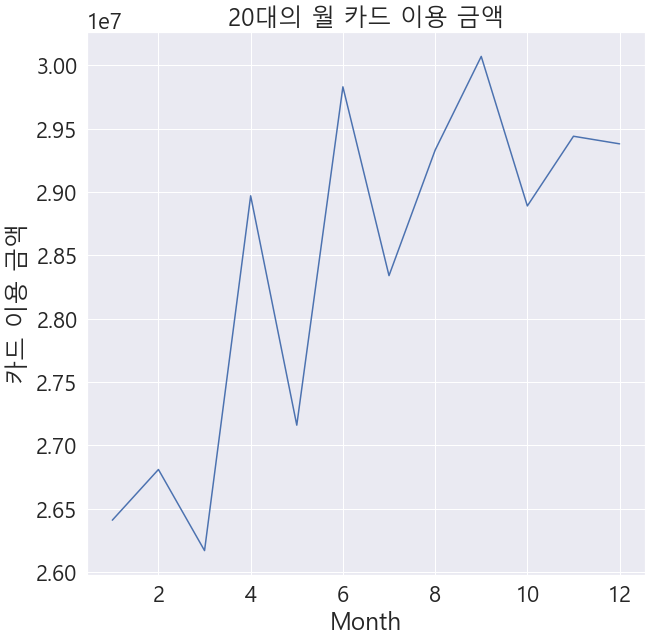

In [401]:
data3 = card[card['ages'] == '20대'].groupby('month').monthly_card_spend.sum()

f, ax = plt.subplots(figsize = (10, 10))
ax = data3.plot()
ax.set_title('20대의 월 카드 이용 금액')
ax.set_xlabel('Month')
ax.set_ylabel('카드 이용 금액')

Text(0,0.5,'카드 이용 금액')

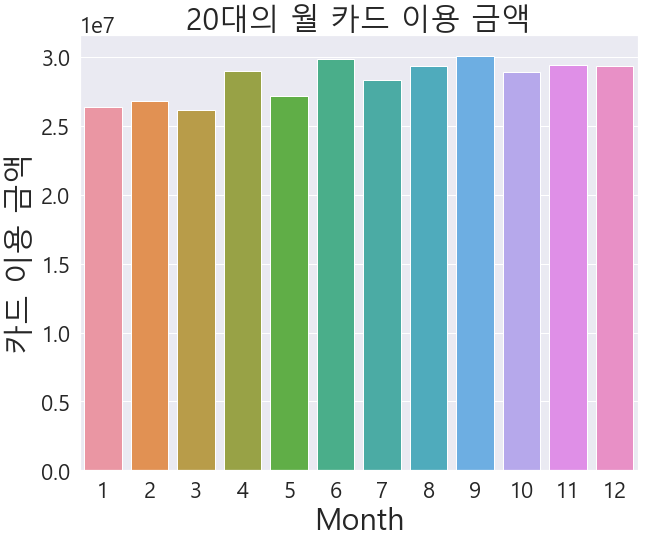

In [402]:
data3_df = pd.DataFrame(data3).reset_index()
ax = plt.subplots(figsize = (10,8))
ax = sns.barplot( x= 'month', y = 'monthly_card_spend', data = data3_df)
ax.set_title('20대의 월 카드 이용 금액', size = 30)
ax.set_xlabel('Month', size = 30)
ax.set_ylabel('카드 이용 금액', size = 30)


# 전체 그래프 통계

(25970000, 30270000)

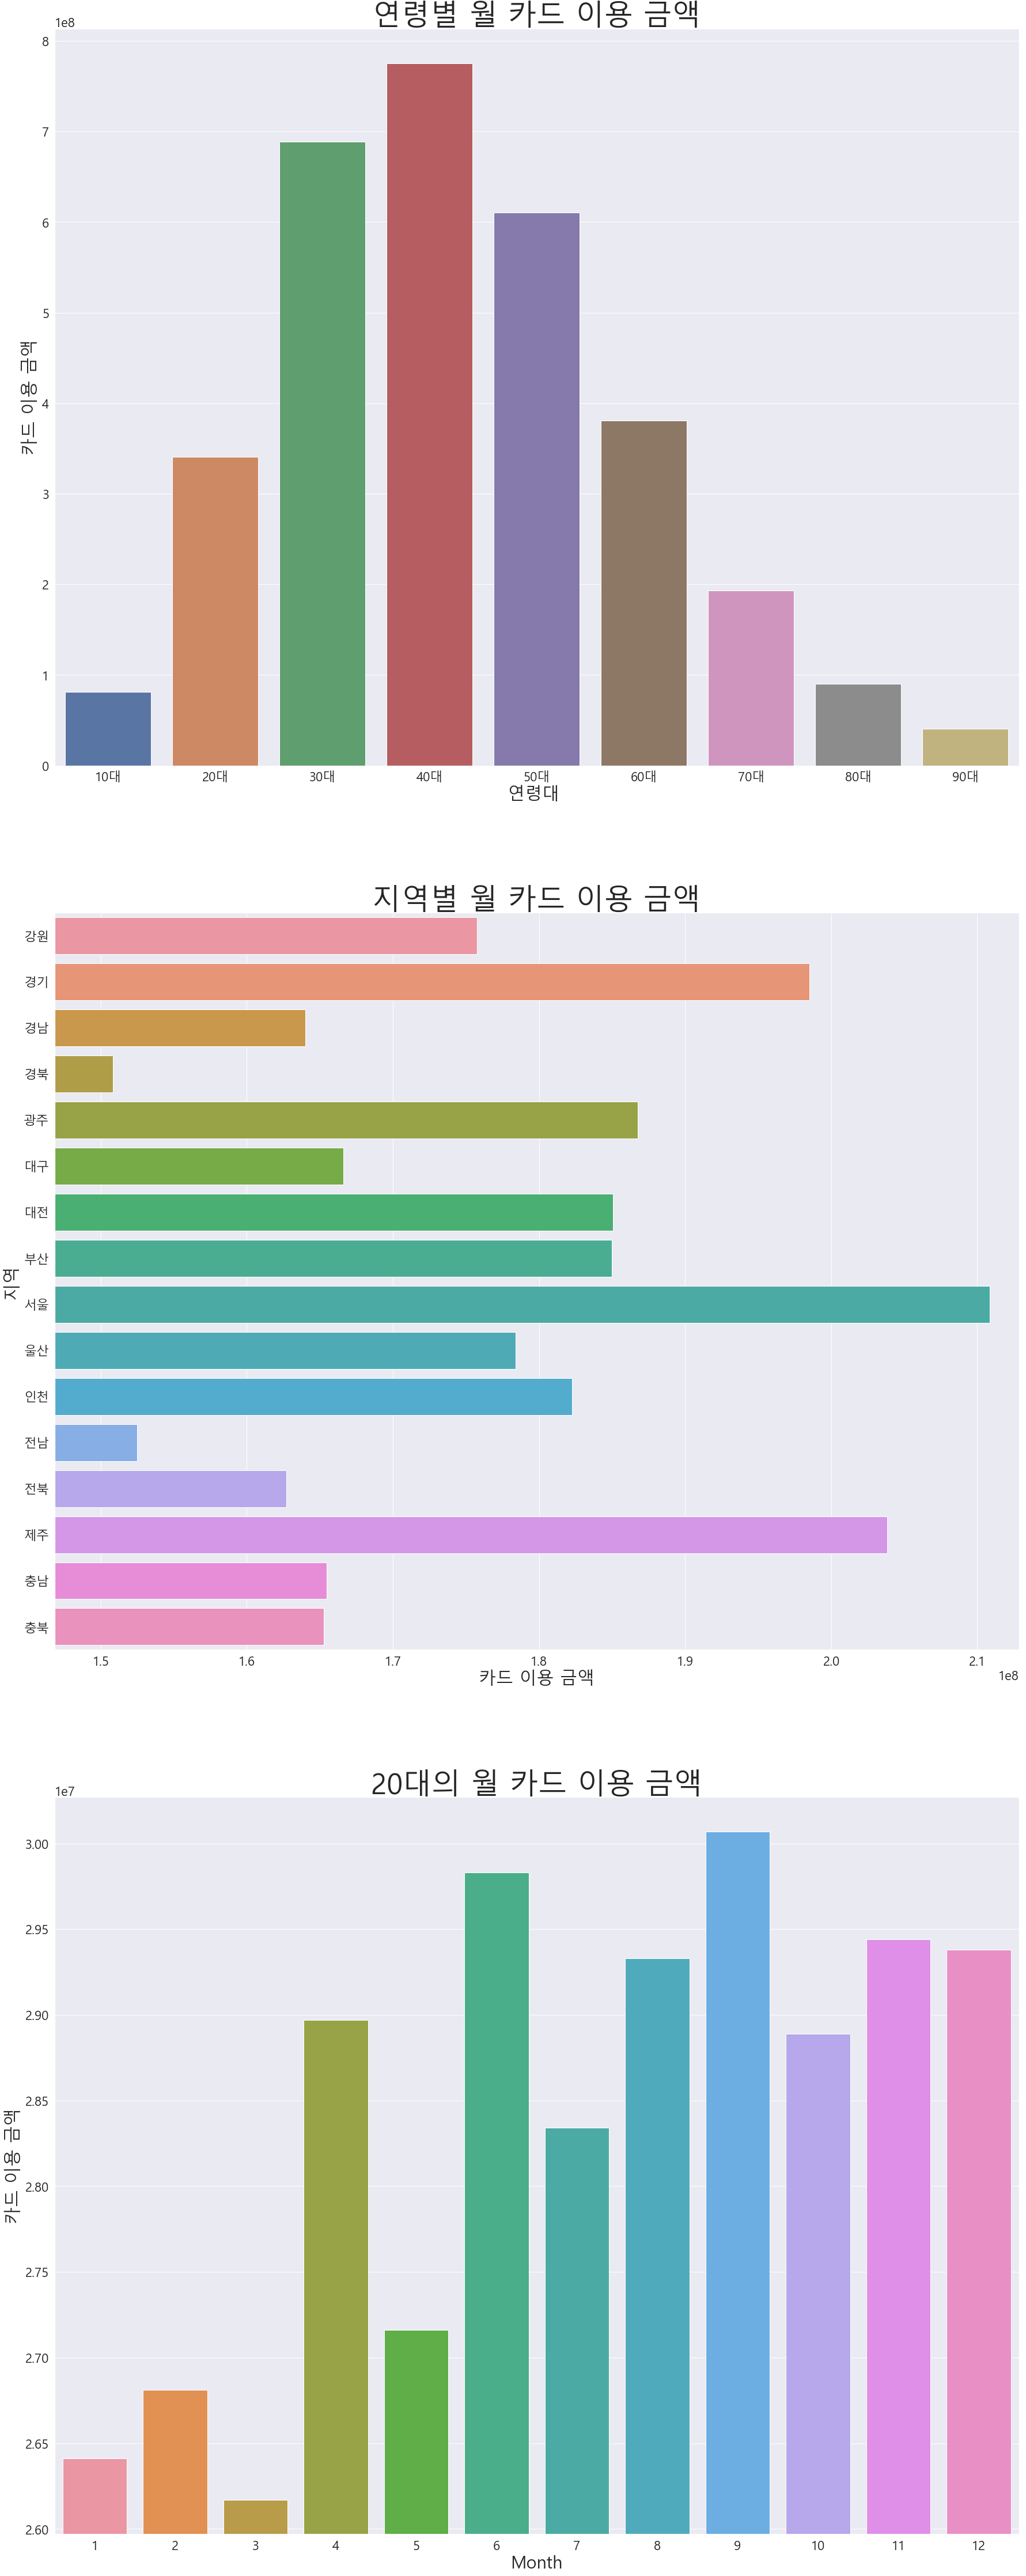

In [403]:
f, ax = plt.subplots(3,1, figsize = (30,80))
ax
sns.set(font_scale=2.0)

sns.barplot( ax = ax[0], x= 'ages', y = 'monthly_card_spend', data = data1_df)
ax[0].set_title('연령별 월 카드 이용 금액', size = 50)
ax[0].set_xlabel('연령대 ',size = 30)
ax[0].set_ylabel('카드 이용 금액', size = 30)

sns.barplot( ax = ax[1], x= 'monthly_card_spend', y = 'city', data = data2_df, label='big')
ax[1].set_title('지역별 월 카드 이용 금액', size = 50)
ax[1].set_ylabel('지역', size = 30)
ax[1].set_xlabel('카드 이용 금액',size = 30)
ax[1].set_xlim(data2_df.monthly_card_spend.min()-4000000,data2_df.monthly_card_spend.max()+2000000)

sns.barplot(ax = ax[2], x= 'month', y = 'monthly_card_spend', data = data3_df)
ax[2].set_title('20대의 월 카드 이용 금액',size = 50)
ax[2].set_xlabel('Month', size = 30)
ax[2].set_ylabel('카드 이용 금액', size = 30)
ax[2].set_ylim(data3_df.monthly_card_spend.min()-200000,data3_df.monthly_card_spend.max()+200000)



Text(0,0.5,'연령대 별 카드 이용 금액')

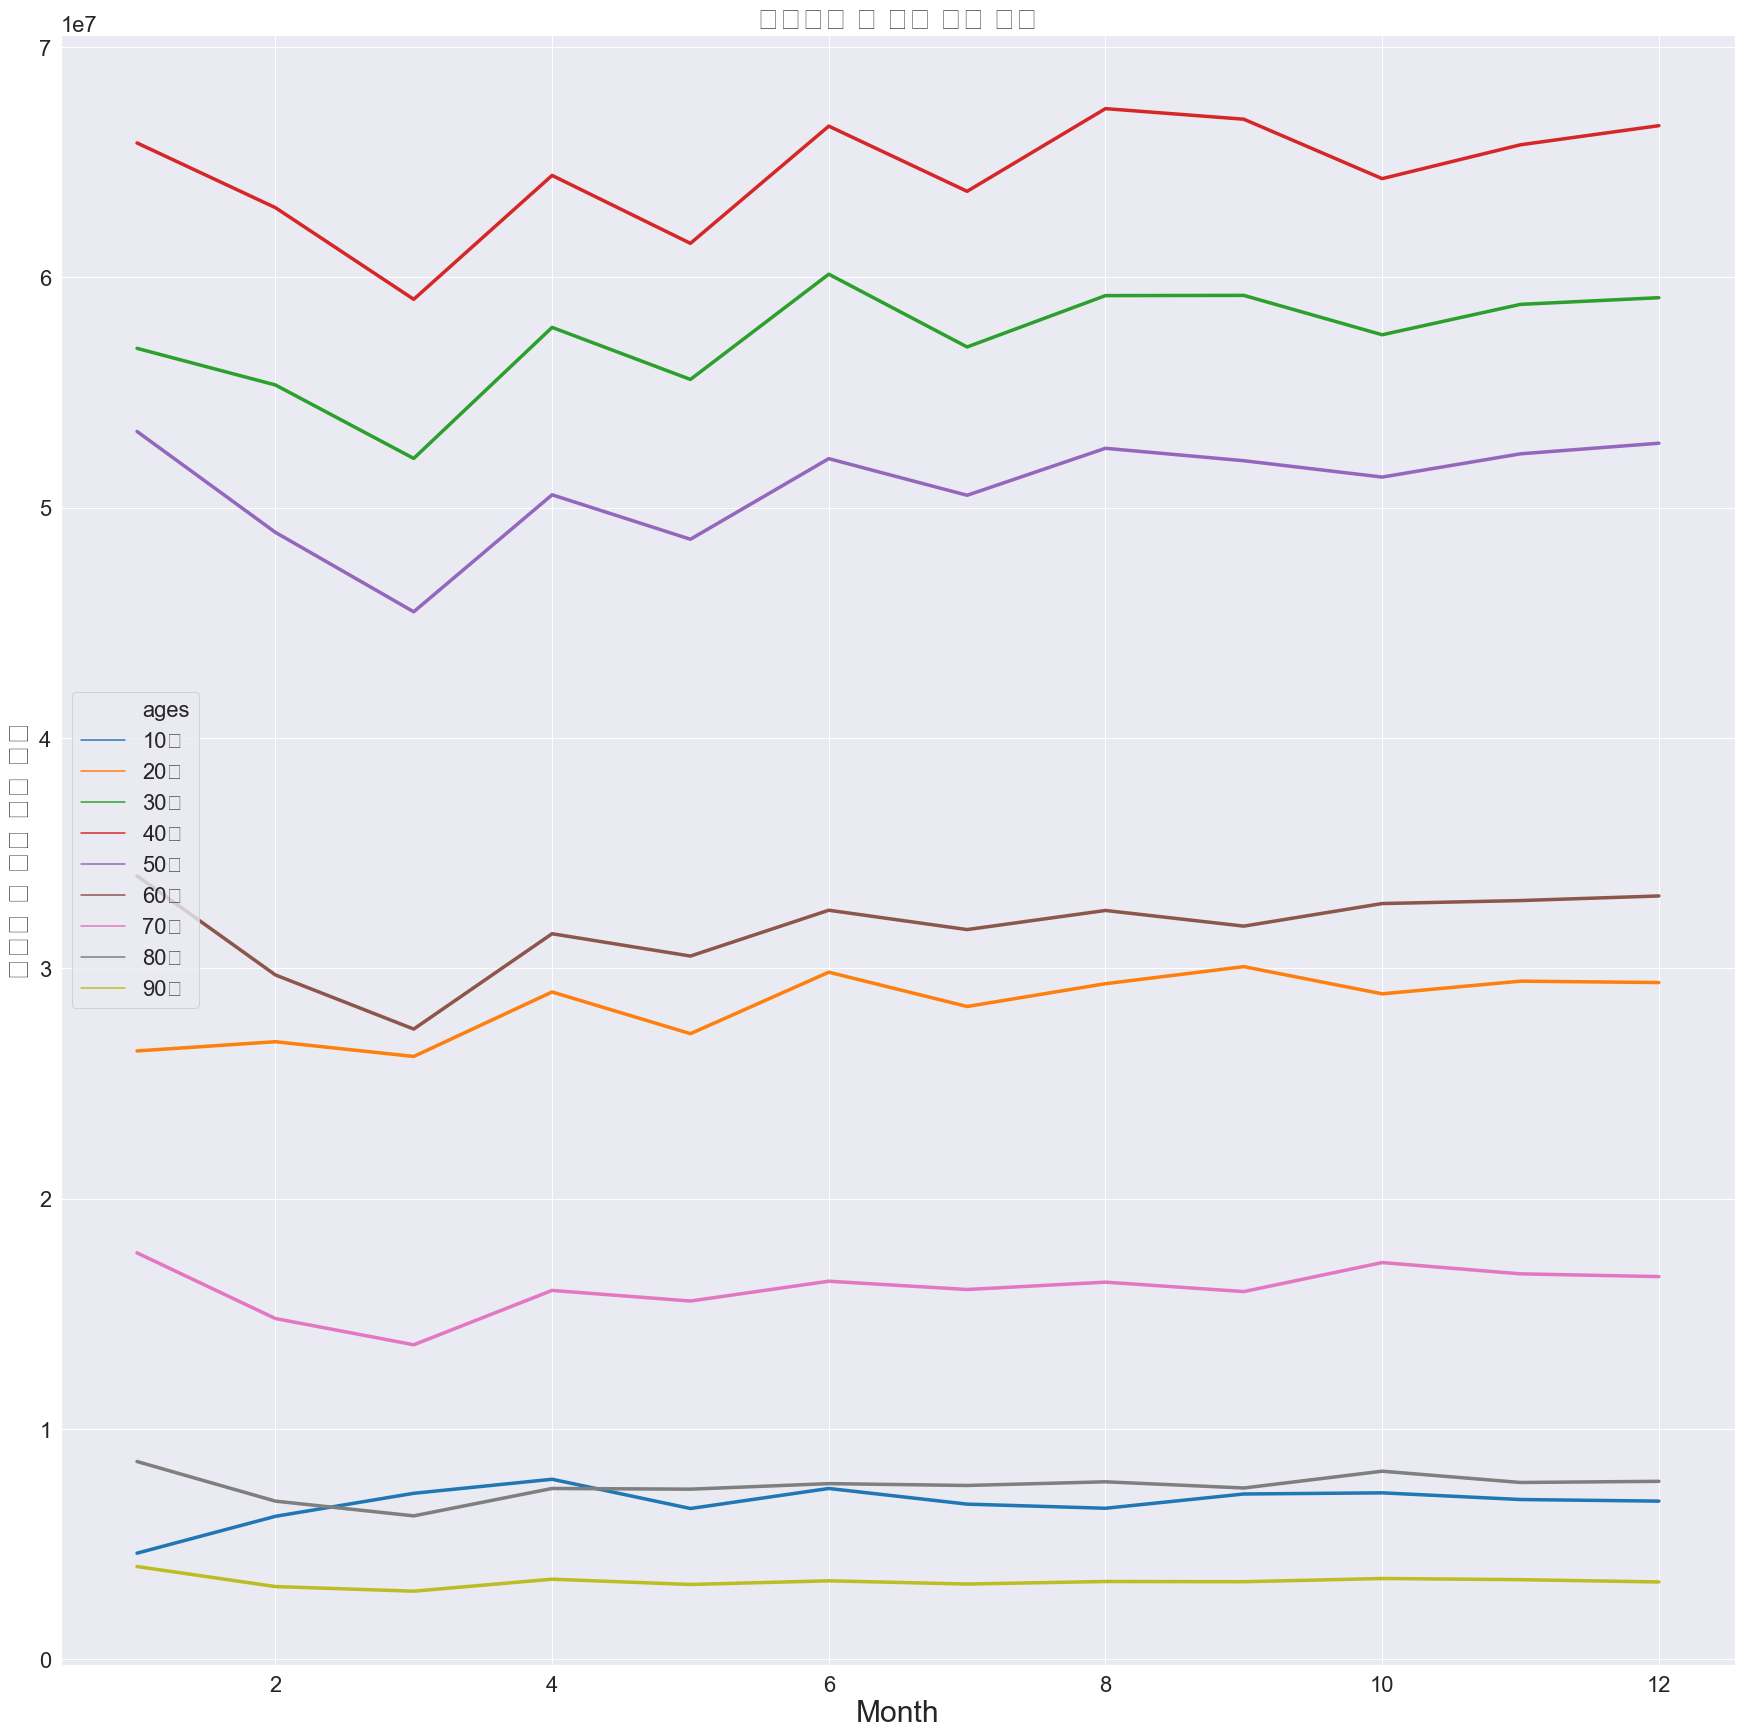

In [404]:
data4 = card.groupby(['ages', 'month']).monthly_card_spend.sum().reset_index()
ax = plt.subplots(figsize = (30,30))
ax = sns.lineplot(data=data4,x = 'month', y = 'monthly_card_spend', hue = 'ages', palette="tab10", linewidth=3.5)
ax.set_title('연령대별 월 카드 이용 금액', size = 30)
ax.set_xlabel('Month', size = 30)
ax.set_ylabel('연령대 별 카드 이용 금액', size = 30)